NAED data analysis

_Import libraries and packages_

In [629]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob

In [630]:
path = '/Users/paulraymond/Downloads/reading_data'

all_ages = glob.glob(path + "/*")

files = []

for filename in all_ages:
    df = pd.read_excel(filename)
    df.columns = df.iloc[7]
    df['Grade'] = df['Year'][0]
    files.append(df[8:])

In [631]:
files[1]

7,Year,Jurisdiction,All students,10th percentile,25th percentile,50th percentile,75th percentile,90th percentile,Grade
8,2019,National,All students,168.299,196.978,224.635,247.704,266.071,"Reading, Grade 4, All students"
9,2019,National public,All students,166.93,195.619,223.561,246.906,265.458,"Reading, Grade 4, All students"
10,2019,National private,All students,‡,‡,‡,‡,‡,"Reading, Grade 4, All students"
11,2017,National,All students,170.879,198.835,225.955,248.619,266.705,"Reading, Grade 4, All students"
12,2017,National public,All students,169.457,197.577,224.841,247.716,265.968,"Reading, Grade 4, All students"
13,2017,National private,All students,‡,‡,‡,‡,‡,"Reading, Grade 4, All students"
14,2015,National,All students,173.924,200.739,226.139,247.992,266.019,"Reading, Grade 4, All students"
15,2015,National public,All students,172.567,199.579,225.056,246.878,264.879,"Reading, Grade 4, All students"
16,2015,National private,All students,‡,‡,‡,‡,‡,"Reading, Grade 4, All students"
17,2013,National,All students,173.528,200.236,225.387,247.179,265.331,"Reading, Grade 4, All students"


In [632]:
data = pd.concat(files, axis=0, ignore_index=True)
data

7,Year,Jurisdiction,All students,10th percentile,25th percentile,50th percentile,75th percentile,90th percentile,Grade
0,2015,National,All students,232.607,260.879,289.424,315.352,337.305,"Reading, Grade 12, All students"
1,2015,National public,All students,231.574,259.322,287.582,313.426,335.399,"Reading, Grade 12, All students"
2,2015,National private,All students,‡,‡,‡,‡,‡,"Reading, Grade 12, All students"
3,2013,National,All students,238.676,264.463,290.5,314.651,335.268,"Reading, Grade 12, All students"
4,2013,National public,All students,237.276,263.068,289.058,313.239,333.989,"Reading, Grade 12, All students"
5,2013,National private,All students,‡,‡,‡,‡,‡,"Reading, Grade 12, All students"
6,2009,National,All students,238.002,263.972,290.646,314.798,335.318,"Reading, Grade 12, All students"
7,2009,National public,All students,236.838,262.722,289.224,313.568,334.356,"Reading, Grade 12, All students"
8,2009,National private,All students,‡,‡,‡,‡,‡,"Reading, Grade 12, All students"
9,2005,National,All students,235.306,261.936,288.174,312.676,333.06,"Reading, Grade 12, All students"


_Adjust 'Grade' column_

In [633]:
data.Grade = [x.split(', ')[1] for x in data.Grade]

In [634]:
data.Grade[1]

'Grade 12'

_Change special characters_

In [635]:
special_chars = ['‡']

In [636]:
for col in data.columns:
    for ind, val in enumerate(data[col]):
        if val in special_chars:
            data[col][ind] = 'NaN'
#     for ind in col:
#         print(ind)
# #         print(data[col][row])
data.head()

7,Year,Jurisdiction,All students,10th percentile,25th percentile,50th percentile,75th percentile,90th percentile,Grade
0,2015,National,All students,232.607,260.879,289.424,315.352,337.305,Grade 12
1,2015,National public,All students,231.574,259.322,287.582,313.426,335.399,Grade 12
2,2015,National private,All students,NaN,NaN,NaN,NaN,NaN,Grade 12
3,2013,National,All students,238.676,264.463,290.5,314.651,335.268,Grade 12
4,2013,National public,All students,237.276,263.068,289.058,313.239,333.989,Grade 12


_Remove null values_

In [637]:
data.isnull().sum()

7
Year                3
Jurisdiction       15
All students       15
10th percentile    15
25th percentile    15
50th percentile    15
75th percentile    15
90th percentile    15
Grade               0
dtype: int64

In [638]:
# data.Jurisdiction
# data.iloc[27]

In [639]:
data.dropna(inplace=True)

In [640]:
data.isna().sum()

7
Year               0
Jurisdiction       0
All students       0
10th percentile    0
25th percentile    0
50th percentile    0
75th percentile    0
90th percentile    0
Grade              0
dtype: int64

In [641]:
data.head(20)

7,Year,Jurisdiction,All students,10th percentile,25th percentile,50th percentile,75th percentile,90th percentile,Grade
0,2015,National,All students,232.607,260.879,289.424,315.352,337.305,Grade 12
1,2015,National public,All students,231.574,259.322,287.582,313.426,335.399,Grade 12
2,2015,National private,All students,NaN,NaN,NaN,NaN,NaN,Grade 12
3,2013,National,All students,238.676,264.463,290.5,314.651,335.268,Grade 12
4,2013,National public,All students,237.276,263.068,289.058,313.239,333.989,Grade 12
5,2013,National private,All students,NaN,NaN,NaN,NaN,NaN,Grade 12
6,2009,National,All students,238.002,263.972,290.646,314.798,335.318,Grade 12
7,2009,National public,All students,236.838,262.722,289.224,313.568,334.356,Grade 12
8,2009,National private,All students,NaN,NaN,NaN,NaN,NaN,Grade 12
9,2005,National,All students,235.306,261.936,288.174,312.676,333.06,Grade 12


_Create df for plot_

In [642]:
plot_data = data.dropna()

In [643]:
plot_data.isna().sum()

7
Year               0
Jurisdiction       0
All students       0
10th percentile    0
25th percentile    0
50th percentile    0
75th percentile    0
90th percentile    0
Grade              0
dtype: int64

In [644]:
# plot_data['10th percentile'].isna()

_Convert columns_

In [645]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 126
Data columns (total 9 columns):
Year               117 non-null object
Jurisdiction       117 non-null object
All students       117 non-null object
10th percentile    117 non-null object
25th percentile    117 non-null object
50th percentile    117 non-null object
75th percentile    117 non-null object
90th percentile    117 non-null object
Grade              117 non-null object
dtypes: object(9)
memory usage: 9.1+ KB


In [646]:
data.columns

Index(['Year', 'Jurisdiction', 'All students', '10th percentile',
       '25th percentile', '50th percentile', '75th percentile',
       '90th percentile', 'Grade'],
      dtype='object', name=7)

In [647]:
num_cols = ['Year', '10th percentile',
       '25th percentile', '50th percentile', '75th percentile',
       '90th percentile']

In [648]:
for col in num_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

_Plot graphs_

In [649]:
data.head(80)

7,Year,Jurisdiction,All students,10th percentile,25th percentile,50th percentile,75th percentile,90th percentile,Grade
0,2015.0,National,All students,232.607500,260.879500,289.424004,315.351999,337.305498,Grade 12
1,2015.0,National public,All students,231.573500,259.322499,287.582497,313.426498,335.398502,Grade 12
2,2015.0,National private,All students,NaN,NaN,NaN,NaN,NaN,Grade 12
3,2013.0,National,All students,238.676001,264.463499,290.499998,314.650500,335.267502,Grade 12
4,2013.0,National public,All students,237.275999,263.067998,289.057999,313.238504,333.988501,Grade 12
5,2013.0,National private,All students,NaN,NaN,NaN,NaN,NaN,Grade 12
6,2009.0,National,All students,238.001999,263.971997,290.646002,314.798004,335.317999,Grade 12
7,2009.0,National public,All students,236.838004,262.722003,289.223999,313.567999,334.356000,Grade 12
8,2009.0,National private,All students,NaN,NaN,NaN,NaN,NaN,Grade 12
9,2005.0,National,All students,235.306000,261.936005,288.173999,312.676007,333.059998,Grade 12


In [650]:
data.describe()

7,Year,10th percentile,25th percentile,50th percentile,75th percentile,90th percentile
count,87.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,2008.275862,206.594130,231.248202,255.723538,277.821452,296.283024
std,6.458615,30.958655,29.595894,28.704013,28.405169,28.543539
min,1998.000000,155.897998,186.848001,215.350000,239.701999,259.112000
25%,2003.000000,173.214502,199.132998,224.541125,246.898750,265.217875
50%,2009.000000,214.539001,239.614998,264.164999,285.810999,303.799002
75%,2013.000000,236.758501,261.583496,283.270001,301.153497,318.206000
max,2019.000000,269.694000,289.246002,309.149994,327.929999,344.590009


In [651]:
#create groups for graphs

In [652]:
jurs_list = list(set(data.Jurisdiction))
jurs_list

['National', 'National public', 'National private']

In [657]:
list((set(data.Grade)))
grade_list = ['Grade 4', 'Grade 8', 'Grade 12']

In [658]:
perc_list = ['10th percentile',
       '25th percentile', '50th percentile', '75th percentile',
       '90th percentile']

In [659]:
years = list(range(1998,2019))

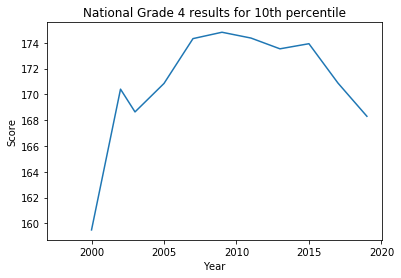

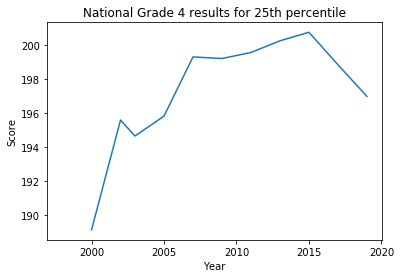

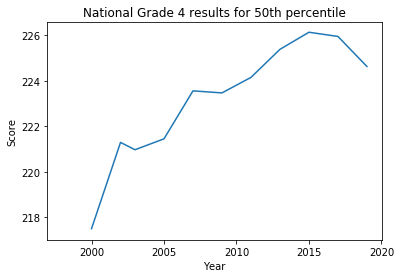

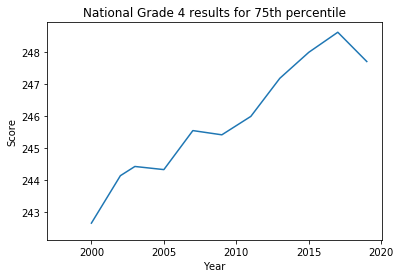

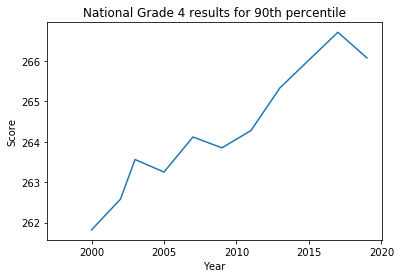

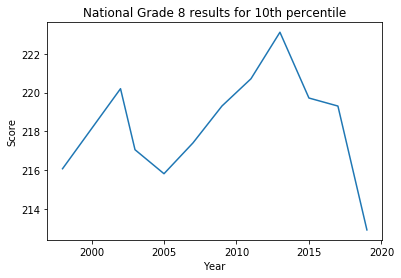

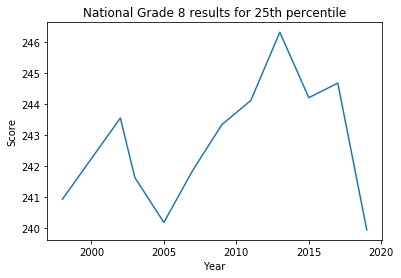

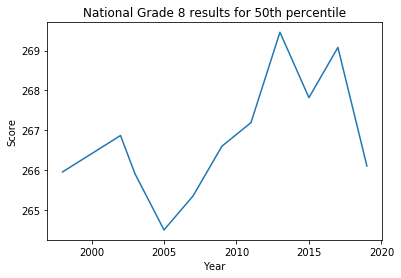

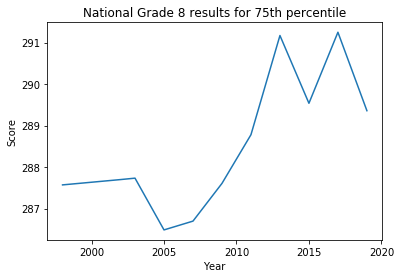

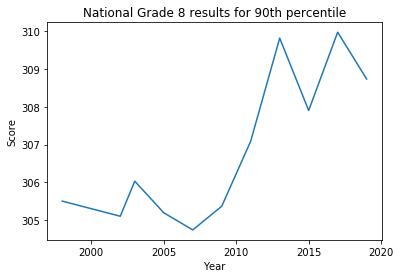

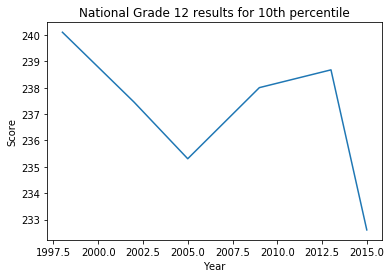

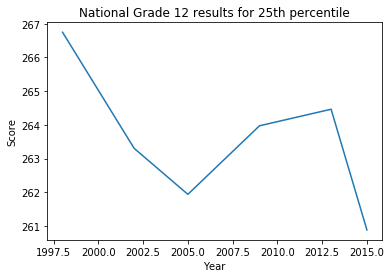

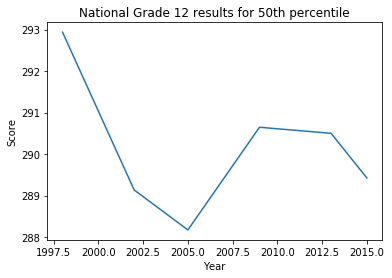

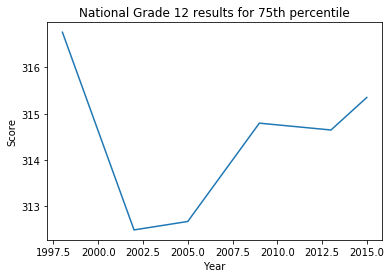

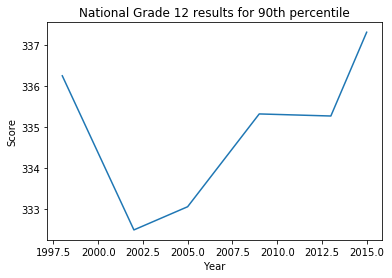

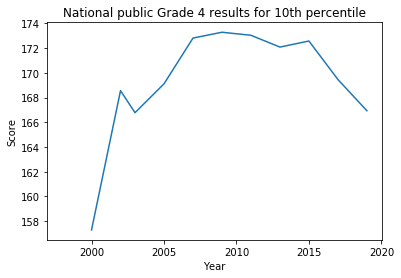

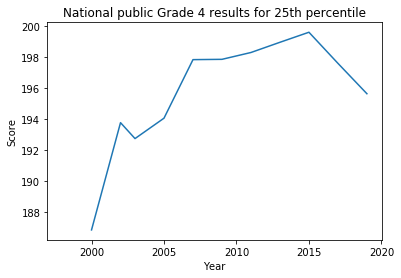

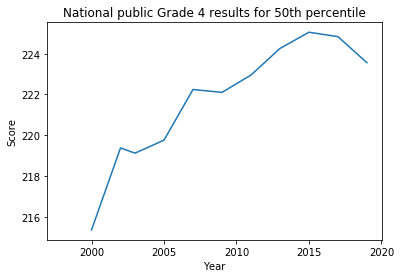

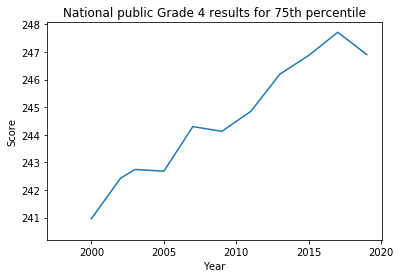

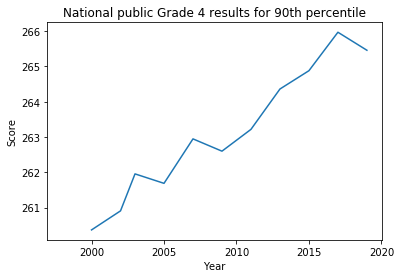

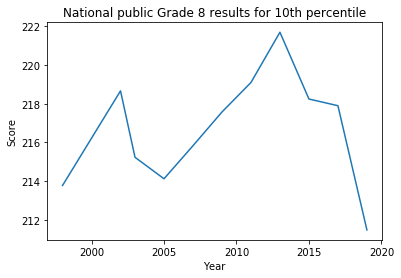

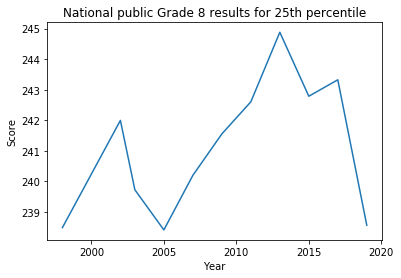

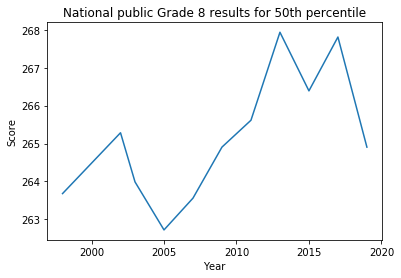

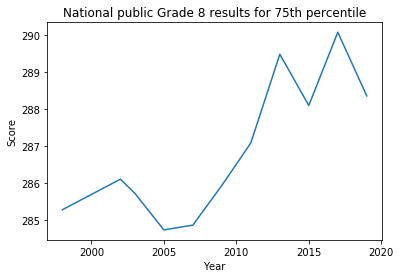

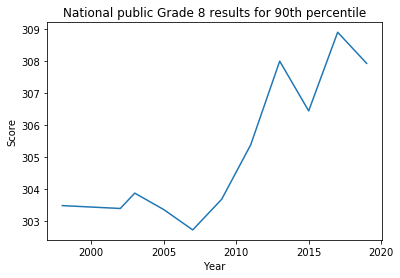

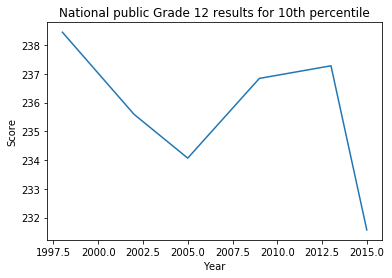

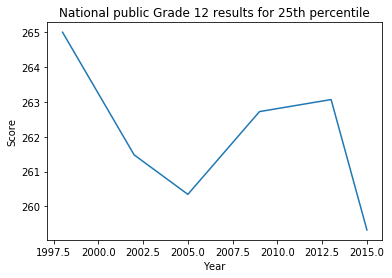

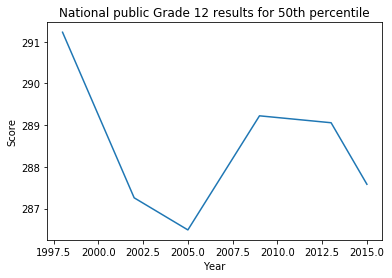

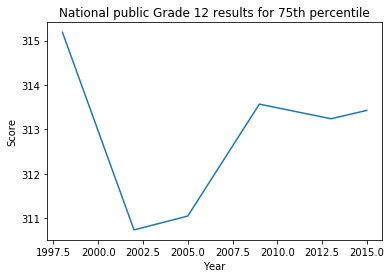

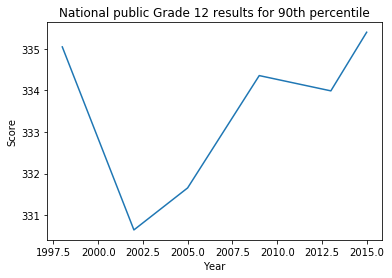

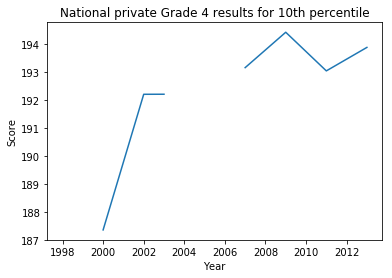

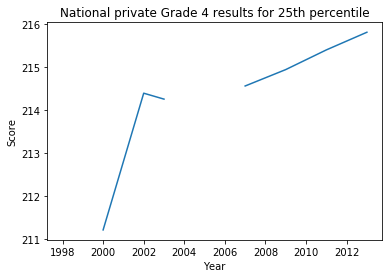

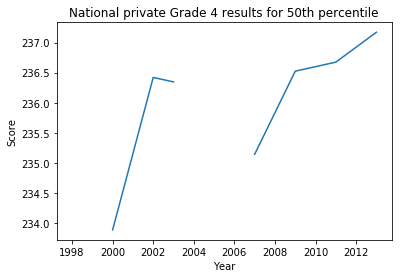

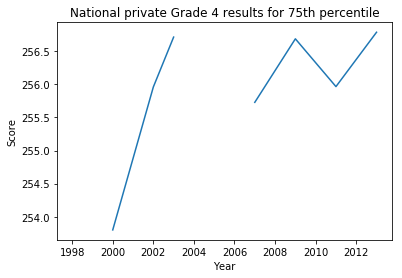

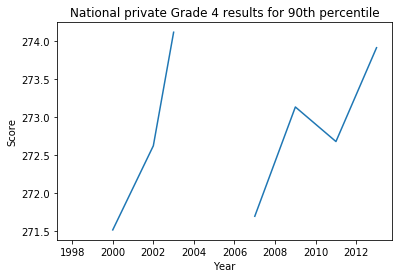

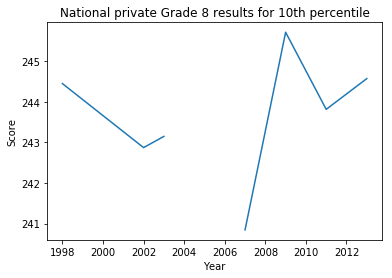

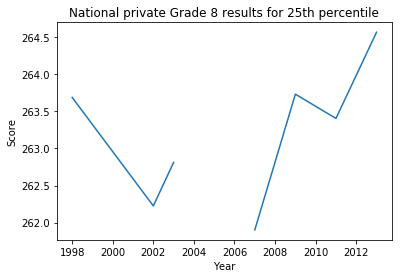

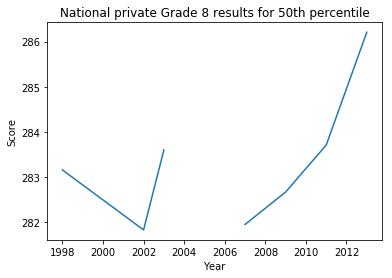

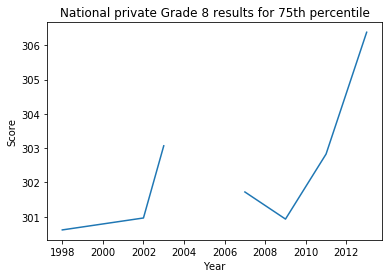

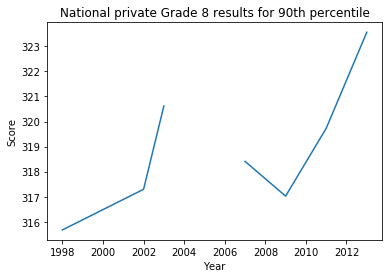

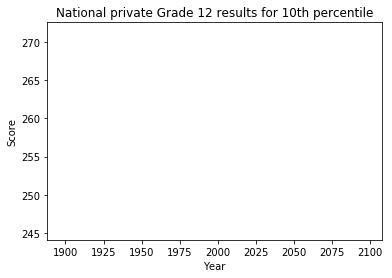

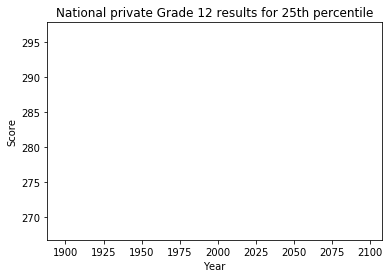

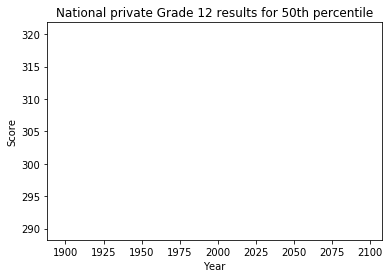

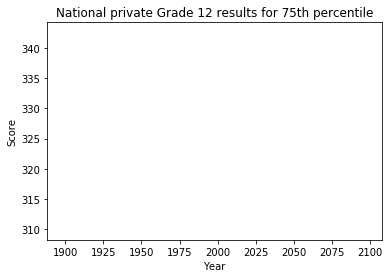

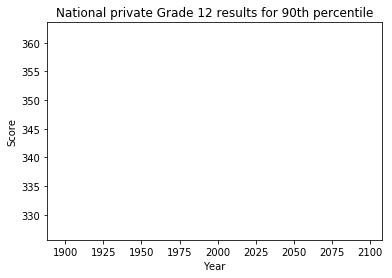

In [660]:
for group in jurs_list:
    for grade in grade_list:
        for perc in perc_list:
#         print(group)
#         print(grade)
            plot_df = data.loc[(data.Grade == grade) & (data.Jurisdiction == group)]
            plt.plot(plot_df.Year, plot_df[perc])
            plt.title('{} {} results for {}'.format(group, grade, perc))
            plt.xlabel('Year')
            plt.ylabel('Score')
            plt.show()

_Reformat dataframe for series plot_

In [661]:
data.head(30)
data.Year.get_values()

array([2015., 2015., 2015., 2013., 2013., 2013., 2009., 2009., 2009.,
       2005., 2005., 2005., 2002., 2002., 2002., 1998., 1998., 1998.,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
       2019., 2019., 2019., 2017., 2017., 2017., 2015., 2015., 2015.,
       2013., 2013., 2013., 2011., 2011., 2011., 2009., 2009., 2009.,
       2007., 2007., 2007., 2005., 2005., 2005., 2003., 2003., 2003.,
       2002., 2002., 2002., 2000., 2000., 2000.,   nan,   nan,   nan,
       1998., 1998., 1998.,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan, 2019., 2019., 2019., 2017., 2017., 2017.,
       2015., 2015., 2015., 2013., 2013., 2013., 2011., 2011., 2011.,
       2009., 2009., 2009., 2007., 2007., 2007., 2005., 2005., 2005.,
       2003., 2003., 2003., 2002., 2002., 2002., 1998., 1998., 1998.,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan])

In [662]:
# create series of years for cohort
def graph_yrs(year):
    if year < 2012:
        cohort_list = []
        df_cohort_list = []
        cohort_list.append(year)
        cohort_list.append(year+4)
        cohort_list.append(year+8)
        for yr in cohort_list:
            if yr in data.Year.get_values():
                df_cohort_list.append(yr)
    return cohort_list

In [663]:
#test function
graph_yrs(2001)

[2001, 2005, 2009]

In [724]:
# create function to get test score values for graph
def graph_vals(cohort_list, jurisdiction):
    years = cohort_list
    juris = jurisdiction
    fourth_val = data.loc[(data.Year == years[0]) & ((data.Jurisdiction == juris) & (data.Grade == 'Grade 4'))]
    eighth_val = data.loc[(data.Year == years[1]) & ((data.Jurisdiction == juris) & (data.Grade == 'Grade 8'))]
    twelth_val = data.loc[(data.Year == years[2]) & ((data.Jurisdiction == juris) & (data.Grade == 'Grade 12'))]
    df = pd.concat([fourth_val, eighth_val, twelth_val], 0)
    df.drop(['Year','Jurisdiction','All students', 'Grade'], 1, inplace=True)
    plt.stackplot(years, df.T)
#     return df /

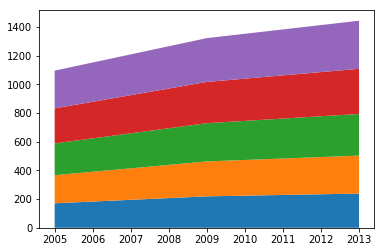

In [725]:
graph_vals(graph_yrs(2005), 'National')

In [ ]:
# create loop to plot graph plots
for yr in years:
    cohort_years = graph_yrs(yr)
    

In [593]:
#create loop with years
#create stack of percentiles
#complete for each student type

str